<center>

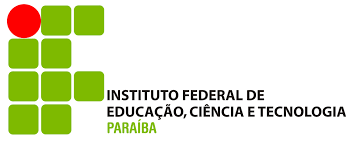

<center>

INSTITUTO FEDERAL DE CIÊNCIA E TECNOLOGIA DA PARAÍBA

CAMPUS CAMPINA GRANDE

BACHARELADO EM ENGENHARIA DA COMPUTAÇÃO

DISCIPLINA: CONTROLE E AUTOMAÇÃO

PROFESSOR: MOACY PEREIRA DA SILVA

<center>

<br>
<br>
<br>

**ESTUDO DIRIGIDO DA DISCIPLINA: CONTROLE E AUTOMAÇÃO**

<br>

**Entrega 01**

<br>
<br>

Daniel Barbosa Vasconcelos

<center>

<br>
<br>
<br>

30 de outubro de 2025 <br>
Campina Grande, PB

In [1]:
!pip install control
!pip install tclab
from control import *
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
import control as ctrl
import control as ctl
from scipy.signal import TransferFunction, impulse


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 4.0 MB/s eta 0:00:00


# **Capítulo 6: A Estabilidade de Sistemas Lineares com Retroação**

## Resumo Técnico: Análise de Estabilidade e Critério de Routh-Hurwitz

Este capítulo aborda o conceito mais crítico no projeto de sistemas de controle: a **estabilidade**. Um sistema de controle só é útil se for estável.

---

## 6.1 O Conceito de Estabilidade

Um sistema é considerado **estável** se, para qualquer entrada limitada ( limitada em amplitude), a saída também for limitada. Isso é conhecido como estabilidade **BIBO (Bounded-Input, Bounded-Output)**.

A estabilidade de um sistema linear invariante no tempo (LIT) é determinada pela localização dos **polos** da sua função de transferência em malha fechada.

#### **Condição de Estabilidade e Polos**

A estabilidade é determinada pelas raízes da **Equação Característica** (o denominador da função de transferência de malha fechada $T(s)$):
$$
q(s) = 1 + G(s)H(s) = 0
$$

A condição para estabilidade é:

> **Um sistema é estável se, e somente se, todos os polos de malha fechada (raízes de $q(s)$) estiverem localizados no semiplano esquerdo (SPE) do plano $s$.**

* Se qualquer polo tiver parte real positiva (estiver no semiplano direito, SPD), o sistema é **instável**.
* Se houver polos no eixo imaginário ($j\omega$) e nenhum no SPD, o sistema é **marginalmente estável** (oscilatório).

---

## 6.2 O Critério de Estabilidade de Routh-Hurwitz

O **Critério de Routh-Hurwitz** é uma ferramenta matemática poderosa que nos permite determinar a estabilidade de um sistema **sem precisar calcular os polos**. Ele apenas utiliza os coeficientes da equação característica:

$$
q(s) = a_ns^n + a_{n-1}s^{n-1} + \cdots + a_1s + a_0 = 0
$$

#### **Regra de Routh-Hurwitz**
O critério baseia-se na construção de uma tabela (Arranjo de Routh) a partir dos coeficientes $a_i$.

* **Condição Necessária (mas não suficiente):** Todos os coeficientes $a_i$ devem existir e ter o **mesmo sinal** (geralmente, todos positivos). Se algum coeficiente for zero ou negativo, o sistema é instável ou marginalmente estável.
* **Condição Necessária e Suficiente:** O sistema é estável se, e somente se, **todos os elementos da primeira coluna da Tabela de Routh tiverem o mesmo sinal**.

A regra principal é:
> **O número de trocas de sinal na primeira coluna da Tabela de Routh é exatamente igual ao número de polos no semiplano direito (SPD), ou seja, o número de polos instáveis.**

---

## 6.3 Exemplo de Projeto: Encontrando a Faixa de Ganho Estável (K)

Este é o uso mais comum do Critério de Routh: determinar a faixa de valores para um ganho $K$ que mantém o sistema estável.

Considere um sistema de controle de posicionamento com realimentação unitária ($H(s)=1$) e a seguinte função de transferência de malha aberta:
$$
G(s) = \frac{K}{s(s+2)(s+4)}
$$

**1. Encontrar a Equação Característica:**
$$
q(s) = 1 + G(s)H(s) = 0
$$
$$
1 + \frac{K}{s(s^2 + 6s + 8)} = 0
$$
$$
s(s^2 + 6s + 8) + K = 0
$$
$$
q(s) = s^3 + 6s^2 + 8s + K = 0
$$

**2. Construir a Tabela de Routh:**
Usamos os coeficientes $a_3=1$, $a_2=6$, $a_1=8$, $a_0=K$.

| Linha | Coef. 1 | Coef. 2 |
| :---: | :---: | :---: |
| $s^3$ | $1$ | $8$ |
| $s^2$ | $6$ | $K$ |
| $s^1$ | $b_1$ | $0$ |
| $s^0$ | $c_1$ | $0$ |

**3. Calcular os Elementos da Primeira Coluna:**

* **Para $b_1$ (linha $s^1$):**
    $$
    b_1 = \frac{(6 \times 8) - (1 \times K)}{6} = \frac{48 - K}{6}
    $$
* **Para $c_1$ (linha $s^0$):**
    $$
    c_1 = \frac{(b_1 \times K) - (6 \times 0)}{b_1} = K
    $$

**4. Aplicar a Condição de Estabilidade:**
Para o sistema ser estável, todos os elementos da primeira coluna (1, 6, $b_1$, $c_1$) devem ser positivos.

* `1 > 0` (OK)
* `6 > 0` (OK)
* **$b_1 > 0 \implies \frac{48 - K}{6} > 0 \implies 48 - K > 0 \implies K < 48$**
* **$c_1 > 0 \implies K > 0$**

**Conclusão:** O sistema é estável para **$0 < K < 48$**. O **Ganho Crítico** é $K_{cr} = 48$.

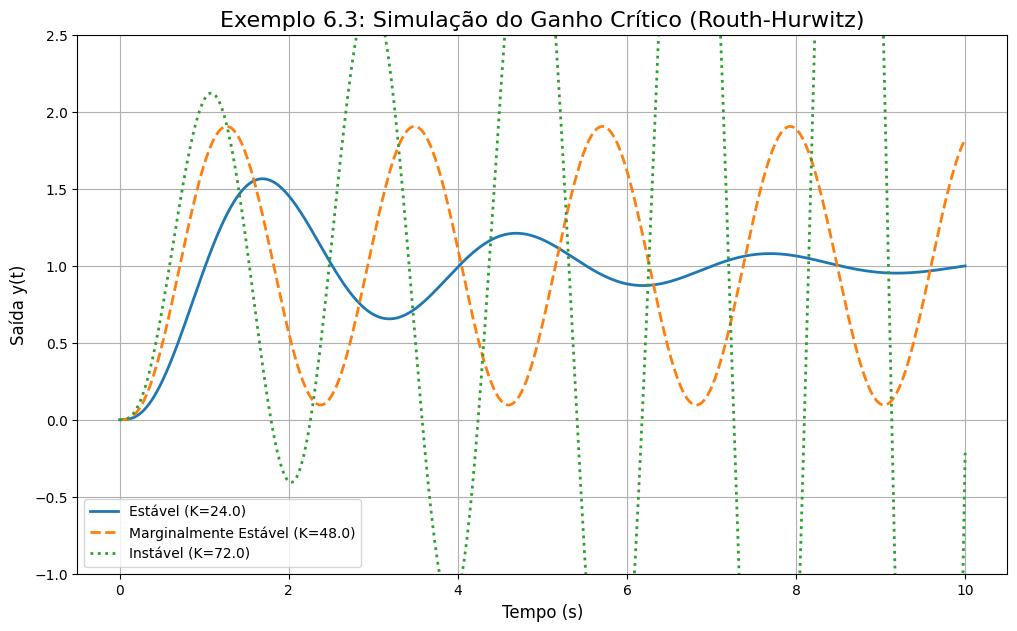


Análise da Simulação:
K=24.0 (Estável): A saída converge para um valor final (assentamento).
K=48.0 (Marginal): A saída oscila continuamente (sem crescer ou decair).
K=72.0 (Instável): A saída cresce indefinidamente (diverge).


In [2]:
# Instale a biblioteca python-control se necessário
# !pip install python-control

import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definição da Planta (G(s)) ---
# G(s) = 1 / (s(s+2)(s+4))
# (Usamos K=1 como base e multiplicamos pelo ganho K depois)
s = ct.tf('s')
G = 1 / (s * (s + 2) * (s + 4))

# --- 2. Definição dos Ganhos K para Teste ---
# De acordo com Routh-Hurwitz, K_critico = 48
K_estavel = 24.0   # 0 < K < 48 (Metade do ganho crítico)
K_critico = 48.0   # K = 48 (Marginalmente Estável)
K_instavel = 72.0  # K > 48 (Instável)

# --- 3. Criação dos Sistemas em Malha Fechada ---
# T(s) = (K*G) / (1 + K*G)
T_estavel = ct.feedback(K_estavel * G, 1)
T_critico = ct.feedback(K_critico * G, 1)
T_instavel = ct.feedback(K_instavel * G, 1)

# --- 4. Simulação da Resposta ao Degrau ---
t = np.linspace(0, 10, 1000)
t_est, y_est = ct.step_response(T_estavel, T=t)
t_crit, y_crit = ct.step_response(T_critico, T=t)
t_inst, y_inst = ct.step_response(T_instavel, T=t)

# --- 5. Plotagem dos Resultados ---
plt.figure(figsize=(12, 7))
plt.plot(t_est, y_est, label=f'Estável (K={K_estavel})', linewidth=2)
plt.plot(t_crit, y_crit, label=f'Marginalmente Estável (K={K_critico})', linewidth=2, linestyle='--')
plt.plot(t_inst, y_inst, label=f'Instável (K={K_instavel})', linewidth=2, linestyle=':')

plt.title('Exemplo 6.3: Simulação do Ganho Crítico (Routh-Hurwitz)', fontsize=16)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Saída y(t)', fontsize=12)
plt.legend()
plt.grid(True)
plt.ylim(-1, 2.5) # Limita o eixo Y para melhor visualização da instabilidade
plt.show()

print("\nAnálise da Simulação:")
print(f"K={K_estavel} (Estável): A saída converge para um valor final (assentamento).")
print(f"K={K_critico} (Marginal): A saída oscila continuamente (sem crescer ou decair).")
print(f"K={K_instavel} (Instável): A saída cresce indefinidamente (diverge).")

## 6.4 Casos Especiais do Critério de Routh

Existem duas situações especiais que podem ocorrer na Tabela de Routh.

### Caso 1: Zero na Primeira Coluna
Se um elemento na primeira coluna for zero, mas a linha inteira não for zero.
* **Solução:** Substitui-se o zero por um número muito pequeno e positivo, **$\epsilon$ (epsilon)**, e continua-se o cálculo. A estabilidade é então verificada analisando o sinal dos termos com $\epsilon$ quando $\epsilon \to 0$.

### Caso 2: Linha Inteira de Zeros
Isso indica que existem polos **simetricamente opostos** em relação à origem. Isso pode significar:
1.  Polos no eixo imaginário (ex: $s = \pm j\omega$) -> **Estabilidade Marginal**.
2.  Polos reais simétricos (ex: $s = \pm \sigma$).
3.  Pares de polos complexos simétricos (ex: $s = \pm \sigma \pm j\omega$).

* **Solução:**
    1.  Forma-se o **Polinômio Auxiliar $P(s)$** com os coeficientes da linha *acima* da linha de zeros.
    2.  Calcula-se a derivada do polinômio auxiliar: $\frac{dP(s)}{ds}$.
    3.  Os coeficientes da derivada substituem a linha de zeros.
    4.  Continua-se a tabela.
* **Importante:** As raízes do Polinômio Auxiliar $P(s) = 0$ são os polos simétricos do sistema.

---

## 6.5 Exemplo de Projeto: Caso Especial (Linha de Zeros)

O objetivo é analisar a estabilidade do sistema com a seguinte equação característica (um caso clássico de linha de zeros):
$$
q(s) = s^3 + 2s^2 + s + 2 = 0
$$

**1. Construir a Tabela de Routh:**
| Linha | Coef. 1 | Coef. 2 |
| :---: | :---: | :---: |
| $s^3$ | $1$ | $1$ |
| $s^2$ | $2$ | $2$ |
| $s^1$ | $b_1$ | $0$ |
| $s^0$ | $c_1$ | $0$ |

**2. Calcular $b_1$:**
$$
b_1 = \frac{(2 \times 1) - (1 \times 2)}{2} = \frac{0}{2} = 0
$$
Como $b_1 = 0$ e o próximo termo também é 0, temos uma **linha inteira de zeros** na linha $s^1$.

**3. Usar o Polinômio Auxiliar (Caso 2):**
* Pegamos a linha acima ($s^2$): $P(s) = 2s^2 + 2$
* Derivamos o polinômio: $\frac{dP(s)}{ds} = 4s + 0$
* Substituímos a linha $s^1$ pelos coeficientes da derivada: `[4, 0]`

**4. Nova Tabela de Routh:**
| Linha | Coef. 1 | Coef. 2 |
| :---: | :---: | :---: |
| $s^3$ | $1$ | $1$ |
| $s^2$ | $2$ | $2$ |
| $s^1$ | **$4$** | **$0$** |
| $s^0$ | $c_1$ | $0$ |

**5. Recalcular $c_1$:**
$$
c_1 = \frac{(4 \times 2) - (2 \times 0)}{4} = \frac{8}{4} = 2
$$

**Conclusão da Análise:**
* **Trocas de Sinal:** A primeira coluna é `[1, 2, 4, 2]`. Não há nenhuma troca de sinal. Isso significa que **não há polos no semiplano direito (SPD)**.
* **Estabilidade:** Como tivemos uma linha de zeros, o sistema não é estritamente estável. Ele é **Marginalmente Estável**.
* **Polos Oscilatórios:** As raízes do Polinômio Auxiliar $P(s) = 2s^2 + 2 = 0$ nos dão os polos no eixo $j\omega$.
    $$
    2s^2 = -2 \implies s^2 = -1 \implies s = \pm j1
    $$
O sistema oscilará com $\omega = 1$ rad/s.

Sistema com Estabilidade Marginal:
<TransferFunction>: sys[23]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

           1
  -------------------
  s^3 + 2 s^2 + s + 2

Polos do sistema: [-2.00000000e+00+0.j  4.71844785e-16+1.j  4.71844785e-16-1.j]
Observe os polos em +/- 1j (no eixo imaginário), como previsto por P(s).


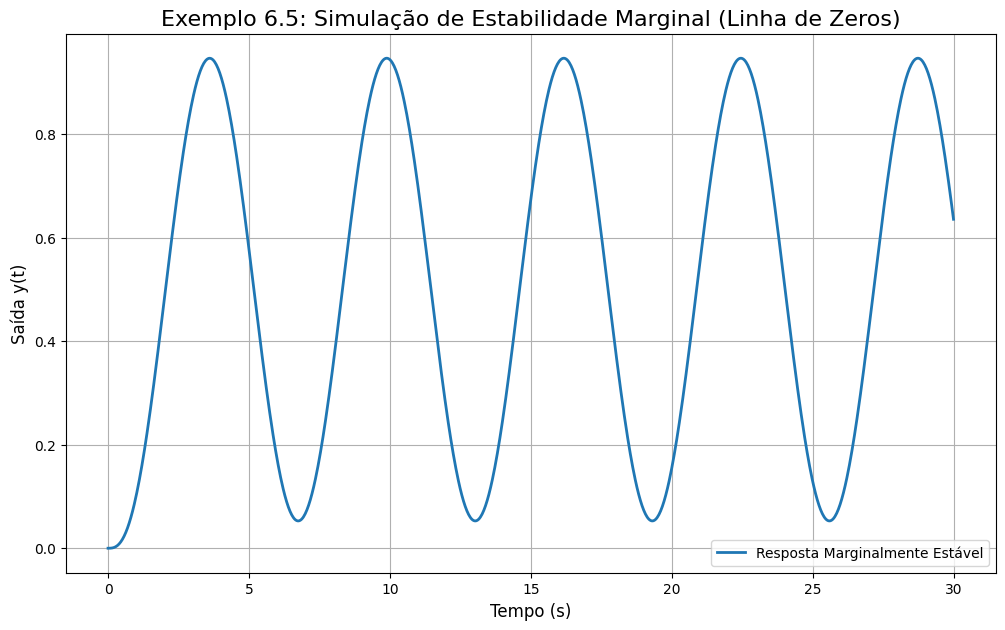


Análise da Simulação:
A saída não converge para um valor final nem explode.
Ela entra em uma oscilação sustentada, confirmando a estabilidade marginal prevista pelo Critério de Routh-Hurwitz (Caso 2).


In [3]:
# Instale a biblioteca python-control se necessário
# !pip install python-control

import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definição do Sistema (Estabilidade Marginal) ---
# T(s) = 1 / (s^3 + 2s^2 + s + 2)
# O numerador (1) não afeta a estabilidade (polos)
num = [1]
den = [1, 2, 1, 2]
T_marginal = ct.tf(num, den)

print("Sistema com Estabilidade Marginal:")
print(T_marginal)

# --- 2. Verificação dos Polos ---
polos = T_marginal.poles()
print(f"\nPolos do sistema: {polos}")
print("Observe os polos em +/- 1j (no eixo imaginário), como previsto por P(s).")

# --- 3. Simulação da Resposta ao Degrau ---
t = np.linspace(0, 30, 1000)
t_resp, y_resp = ct.step_response(T_marginal, T=t)

# --- 4. Plotagem dos Resultados ---
plt.figure(figsize=(12, 7))
plt.plot(t_resp, y_resp, label='Resposta Marginalmente Estável', linewidth=2)
plt.title('Exemplo 6.5: Simulação de Estabilidade Marginal (Linha de Zeros)', fontsize=16)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Saída y(t)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print("\nAnálise da Simulação:")
print("A saída não converge para um valor final nem explode.")
print("Ela entra em uma oscilação sustentada, confirmando a estabilidade marginal prevista pelo Critério de Routh-Hurwitz (Caso 2).")